Evaluating a model using Scoring Parameter

In [46]:
import pandas as pd
heart_disease = pd.read_csv(r"C:\Users\ftska\Documents\sample_project_2\data\heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Setup random seed                                                                                            
import numpy as np
np.random.seed(42)

# Make the data
X= heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

# Split the data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier()

# Fit the model to the data (training the ml model) 
clf.fit(X_train, Y_train)


RandomForestClassifier()

In [48]:
cross_val_score(clf, X, Y, cv=3)

array([0.82178218, 0.84158416, 0.78217822])

In Normal Train and Test Split (model is trained on training data, and evaluated on the test data)
In k-fold cross validation (model is trained on k different versions of training data, and evaluated on k different versions of the test data)


In [49]:
cross_val_score(clf, X, Y, cv=5)

array([0.81967213, 0.8852459 , 0.7704918 , 0.8       , 0.75      ])

In [50]:
clf_cross_val_score=np.mean(cross_val_score(clf, X, Y, cv=3))
clf_cross_val_score

0.8184818481848185

In [51]:
clf_cross_val_score_2=np.mean(cross_val_score(clf, X, Y, cv=5))
clf_cross_val_score_2

0.834808743169399

In [52]:
# Even though cross_val_score's accuracy is lower than the non still we prefer to evalaute using this

In [53]:
# Scoring parameter set to none(by default)
# Default scoring parameter of classifier= mean accuracy

Classification model evaluation matrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

In [54]:
heart_disease.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]
clf= RandomForestClassifier()
cross_val_score=cross_val_score(clf, X, Y, cv=5)


In [56]:
np.mean(clf_cross_val_score)

0.8184818481848185

In [57]:
print(f"heart_disease classifier cross-validated accuracy:{np.mean(cross_val_score)*100:.2f}%")

heart_disease classifier cross-validated accuracy:82.48%


In [58]:
# how likely the model will predict the label (here it is 82.48% )

Area under the receiver operating characteristc curve(AUC/ROC)
* Area Under Curve(AUC)
* ROC curve

ROC curves are the comparision of model's tpr(true positive rate) versus model's fpr(false positive rate)
* True positive= model predicts 1 when truth is 1
* False positive= model predicts 1 when truth is 0
* True negative= model predicts 0 when truth is 0
* False negative= model predicts 0 when truth is 1  

In [59]:
from sklearn.metrics import roc_curve
clf.fit(X_train, Y_train)
Y_probs=clf.predict_proba(X_test)
Y_probs[:10], len(Y_probs)

(array([[0.87, 0.13],
        [0.41, 0.59],
        [0.45, 0.55],
        [0.89, 0.11],
        [0.19, 0.81],
        [0.14, 0.86],
        [0.4 , 0.6 ],
        [0.96, 0.04],
        [1.  , 0.  ],
        [0.43, 0.57]]),
 61)

In [60]:
Y_probs_positive=Y_probs[:, 1]
Y_probs_positive

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57, 0.77,
       0.29, 0.91, 0.07, 0.94, 0.96, 0.99, 0.14, 0.04, 0.05, 0.5 , 0.16,
       0.64, 0.69, 0.69, 0.64, 0.8 , 0.77, 0.14, 0.86, 0.1 , 0.05, 0.05,
       0.36, 0.51, 0.12, 0.51, 0.87, 0.69, 0.87, 0.86, 0.83, 0.81, 0.64,
       0.71, 0.19, 0.64, 1.  , 0.17, 0.03, 0.16, 0.17, 0.77, 0.7 , 0.17,
       0.07, 0.35, 1.  , 0.11, 0.  , 0.14])

In [61]:
fpr, tpr, thresholds=roc_curve(Y_test, Y_probs_positive)
fpr[:10], tpr[:10]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03448276, 0.03448276, 0.03448276]),
 array([0.     , 0.0625 , 0.1875 , 0.25   , 0.34375, 0.375  , 0.4375 ,
        0.4375 , 0.53125, 0.59375]))

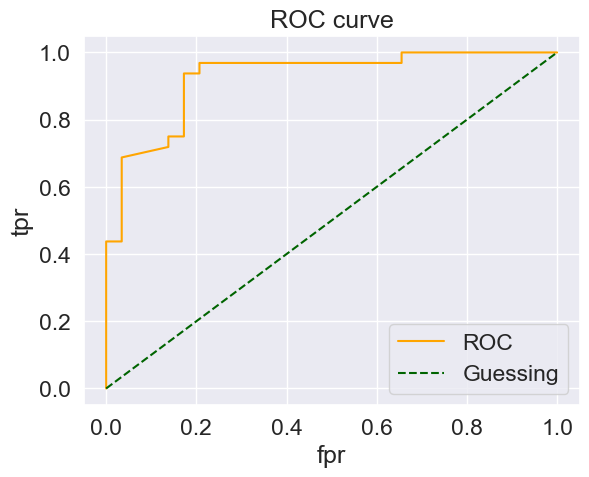

In [62]:
# Create a function for plotting ROC curves (SkLearn doesn.t offer plotting hence we need to define a function and import matplotlib library)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    '''
    plot an ROC curve given fpr and tpr of a model
    
    '''
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkgreen", linestyle="--", label="Guessing")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)    

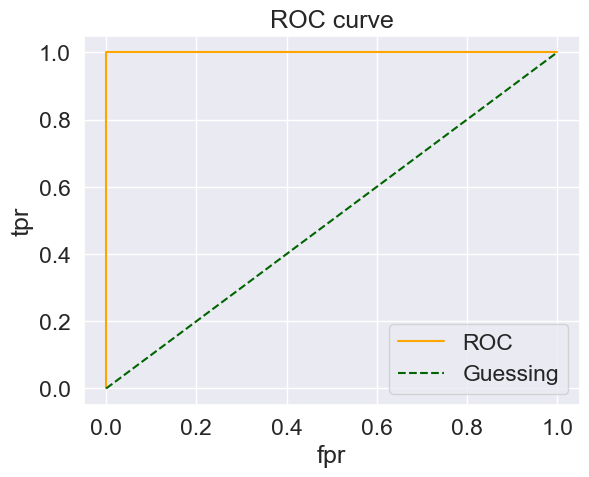

In [63]:
fpr, tpr, thresholds=roc_curve(Y_test, Y_test)
plot_roc_curve(fpr, tpr)

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_probs_positive)

0.9251077586206896

In [65]:
roc_auc_score(Y_test, Y_test)

1.0

 Rather than an ROC curve we can use an auc score

**Confusion Matrix**
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, let's take an idea of where the model get's confused



In [66]:
from sklearn.metrics import confusion_matrix
Y_preds=clf.predict(X_test)
confusion_matrix(Y_test, Y_preds)


array([[24,  5],
       [ 4, 28]], dtype=int64)

In [67]:
pd.crosstab(Y_test, Y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [68]:
24+5+3+29

61

In [69]:
len(Y_preds)

61

In [70]:
# Make our confusion matrix more visual using Seaborn's heatmap() (Plot rectangular data as a coloured encoded matrix)
# Seaborn is a visualization library that is built on the top of matplotlib
 

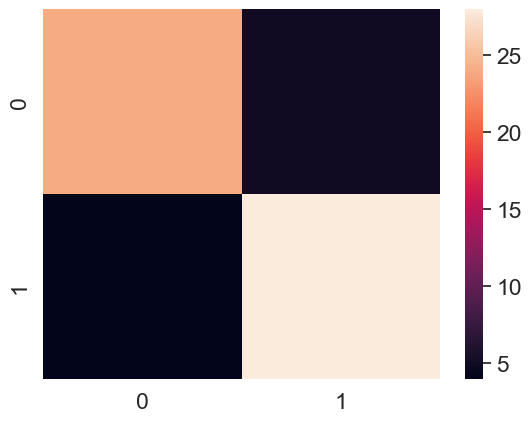

In [71]:
import seaborn as sns
sns.set (font_scale=1.5)
confusion_matrix=confusion_matrix(Y_test, Y_preds)
sns.heatmap(confusion_matrix); 

In [72]:
from sklearn.metrics import confusion_matrix
Y_preds=clf.predict(X_test)
confusion_matrix(Y_test, Y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [73]:
pd.crosstab(Y_test, Y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])


Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


Creating a confusion matrix using Scikit Learn
To use the new methods of creating a confusion matrix with Scikit-Learn we will need a Scikit Learn version 1+


In [74]:
import sklearn
sklearn.__version__

'1.4.1.post1'

Confusion Matrix through 
* Estimator
* Predictions

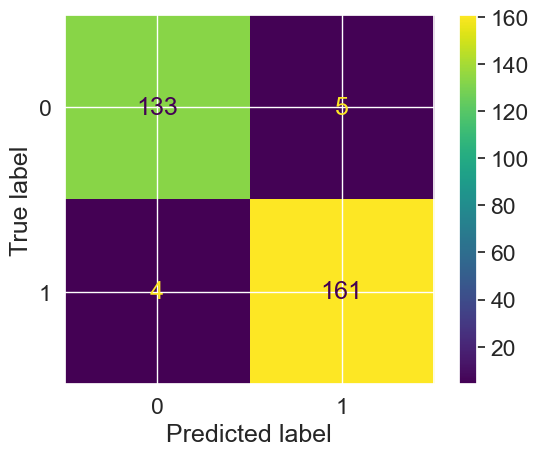

In [75]:
# M1.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y);


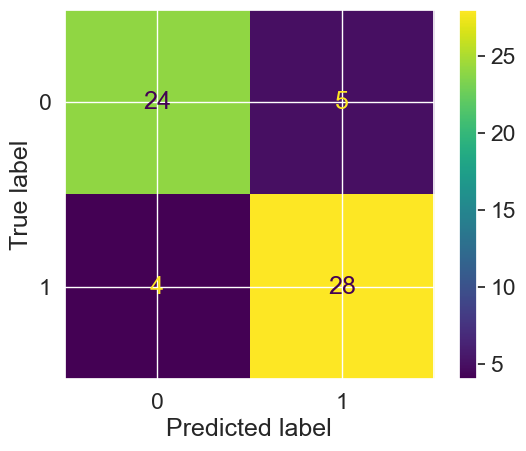

In [76]:
# M2.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_preds);

So far What we have convered in evaluating a classification model-
* Accuracy
* ROC curve
* AUC 
* Confusion Matrix



Final
Classification model evaluation matrix- Classification Report (collection of different evaluation matrix)
*Number of different parameters in evaluating a classsification model*


In [77]:
from sklearn.metrics import classification_report
classification_report(Y_test, Y_preds)

'              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.84        29\n           1       0.85      0.88      0.86        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

In [78]:
# Where precision and recall becomes valuable
disease_true=np.zeros(1000)
specific_indexes=[1,4,7]
disease_true[specific_indexes]=1 # only 3 positive case  (true means Y_test)
disease_preds=np.zeros(1000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

c:\Users\ftska\Documents\sample_project_2\python_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ftska\Documents\sample_project_2\python_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ftska\Documents\sample_project_2\python_venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.997000,0.0,0.997,0.498500,0.994009
recall,1.000000,0.0,0.997,0.500000,0.997000
f1-score,0.998498,0.0,0.997,0.499249,0.995502
support,997.000000,3.0,0.997,1000.000000,1000.000000


Evaluation- we compare the model's prediction to what it should predict


Revising our Scoring Parameter

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]
clf=RandomForestClassifier(n_estimators=100)


In [80]:
import numpy as np
np.random.seed(42)
# Cross Validation Accuracy
cv_acc=cross_val_score(clf, X, Y, cv=5, scoring=None) 
# If scoring is none, estimators's default scoring evaluation metric is used(Accuracy in case of classification problem)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [81]:
# Cross validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")

The cross-validated accuracy is: 82.480874%


In [82]:
np.random.seed(42)
cv_acc=cross_val_score(clf, X, Y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [83]:
# Cross validated accuracy
print(f"the cross-validated accuracy is :{np.mean(cv_acc)*100:2f}")

the cross-validated accuracy is :82.480874


In [84]:
# Precision
np.random.seed(42)
cv_precision=cross_val_score(clf, X, Y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [85]:
# Cross validated Precision
print(f"the cross-validated precision is:{np.mean(cv_precision)}")

the cross-validated precision is:0.8329547346025924


In [86]:
# Recall
np.random.seed(42)
cv_recall=cross_val_score(clf, X, Y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [87]:
# Cross validated recall
# M1. 
np.mean(cv_recall)

0.8545454545454545

In [88]:
# M2.
print(f"the cross-validated recall is:{np.mean(cv_recall)}")

the cross-validated recall is:0.8545454545454545


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)
Y_preds=clf.predict(X_test)
print("classifier metrics on the test set")
print(f"accuracy:{accuracy_score(Y_test, Y_preds)*100:0.2f}%")
print(f"precision:{precision_score(Y_test, Y_preds)*100:0.2f}%")
print(f"recall:{recall_score(Y_test, Y_preds)*100:0.2f}%")
print(f"f1:{f1_score(Y_test, Y_preds)*100:0.2f}%")

classifier metrics on the test set
accuracy:81.97%
precision:87.10%
recall:79.41%
f1:83.08%


### Improving a mocel
First Predictions=baseline predictions
First model=baseline model

From a data perspective:
* Could we collect more data? (Generally the more data the more better)
* Could we improve our data?

From a model prospective:
* Is there a better model we could use?
* Could we improve the better model?

Hyperparameters vs Parameters
* Parameters= model find these patterns in data
* Hyperparameters= setting on a model we can adjust to potentially improve its ability to find patterns

Three ways to adjust hyperparameters
1. by hand
2. randomly with RandomSearchCV
3. exhaustively with GridSearch

In [1]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}